## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [126]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [127]:
df = pd.read_csv('QueryResults (1).csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [128]:
print(df.head())
print(df.tail())

                  DATE     TAG  POSTS
0  2008-07-01 00:00:00      c#      3
1  2008-08-01 00:00:00    ruby     70
2  2008-08-01 00:00:00    perl     28
3  2008-08-01 00:00:00  python    119
4  2008-08-01 00:00:00  delphi     13
                     DATE     TAG  POSTS
2616  2024-04-01 00:00:00      go    363
2617  2024-04-01 00:00:00       r   1657
2618  2024-04-01 00:00:00  delphi    112
2619  2024-04-01 00:00:00     php   1487
2620  2024-04-01 00:00:00    ruby    124


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [129]:
df.shape

(2621, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [130]:
df.count()

DATE     2621
TAG      2621
POSTS    2621
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [131]:
df.groupby('TAG')['POSTS'].sum()

TAG
assembly        44357
c              404310
c#            1616186
c++            807228
delphi          51918
go              72990
java          1917704
javascript    2529059
perl            68109
php           1464810
python        2194524
r              506190
ruby           229070
swift          333610
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [132]:
df.groupby('TAG')['POSTS'].count()

TAG
assembly      189
c             189
c#            190
c++           189
delphi        189
go            174
java          189
javascript    189
perl          189
php           189
python        189
r             187
ruby          189
swift         180
Name: POSTS, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [133]:
# df['DATE'] = df['DATE'].apply(lambda x: dt.strptime(x.split(' ')[0], '%Y-%m-%d')) # same result without pandas method
df['DATE'] = pd.to_datetime(df['DATE'])

## Data Manipulation



In [134]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.fillna(0, inplace=True)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [135]:
print(reshaped_df.shape)

(190, 14)


In [136]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [137]:
print(reshaped_df.head())
print(reshaped_df.tail())

TAG         assembly      c      c#    c++  delphi   go    java  javascript  \
DATE                                                                          
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   83.0   503.0  164.0    13.0  0.0   222.0       163.0   
2008-09-01      28.0  320.0  1639.0  755.0   104.0  0.0  1129.0       634.0   
2008-10-01      16.0  303.0  1987.0  807.0   112.0  0.0  1148.0       722.0   
2008-11-01      16.0  258.0  1729.0  734.0   140.0  0.0   954.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  157.0   119.0  0.0   70.0    0.0  
2008-09-01  130.0  474.0   537.0  6.0  286.0    0.0  
2008-10-01  128.0  604.0   506.0  0.0  247.0    0.0  
2008-11-01   97.0  497.0   448.0  1.0  157.0    0.0  
TAG         assembly      c      c#     c++  delphi     go    java  

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [138]:
reshaped_df.count()

TAG
assembly      190
c             190
c#            190
c++           190
delphi        190
go            190
java          190
javascript    190
perl          190
php           190
python        190
r             190
ruby          190
swift         190
dtype: int64

In [139]:
reshaped_df.isna().any()

TAG
assembly      False
c             False
c#            False
c++           False
delphi        False
go            False
java          False
javascript    False
perl          False
php           False
python        False
r             False
ruby          False
swift         False
dtype: bool

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

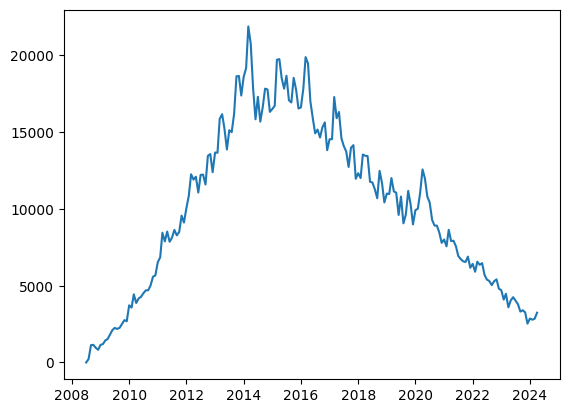

In [141]:
plt.plot(reshaped_df['java'])

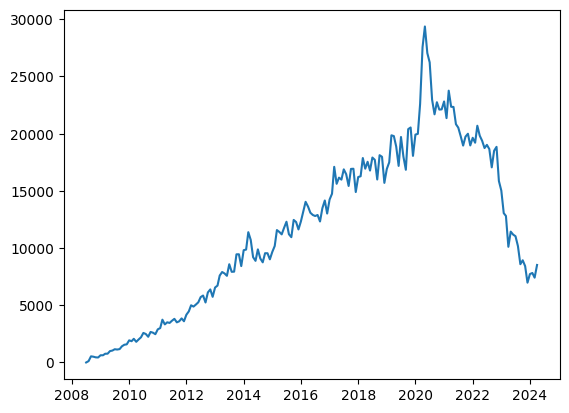

In [142]:
plt.plot(reshaped_df['python'])

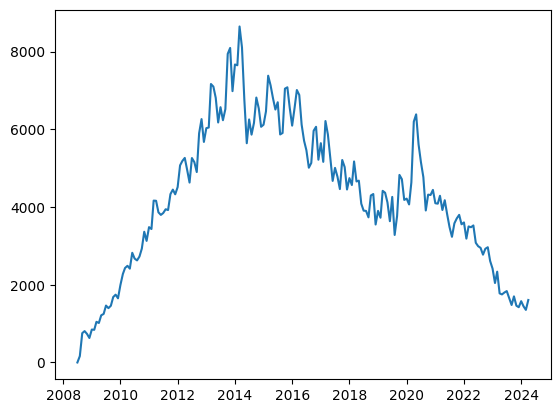

In [144]:
plt.plot(reshaped_df.index, reshaped_df['c++'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

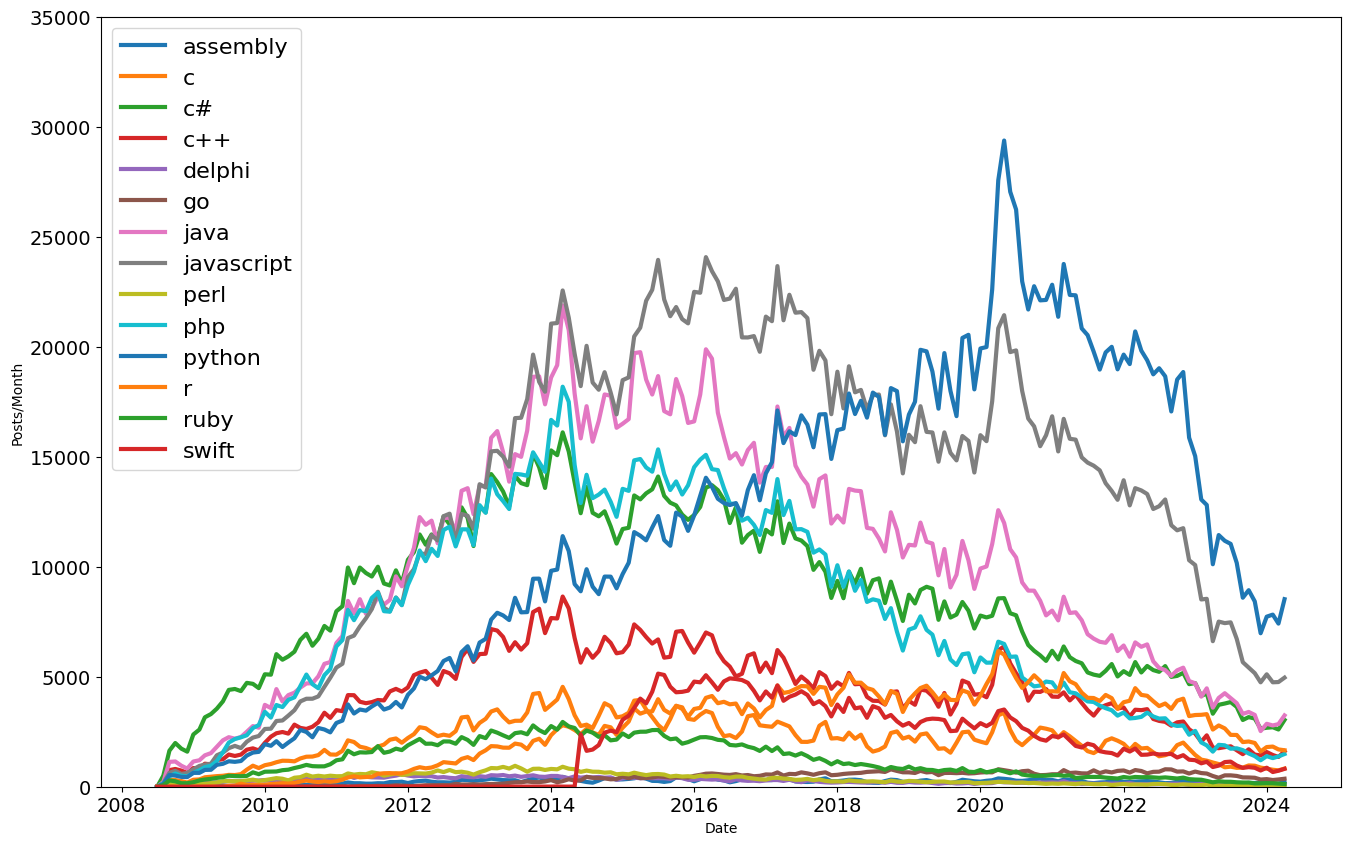

In [153]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date')
plt.ylabel('Posts/Month')

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

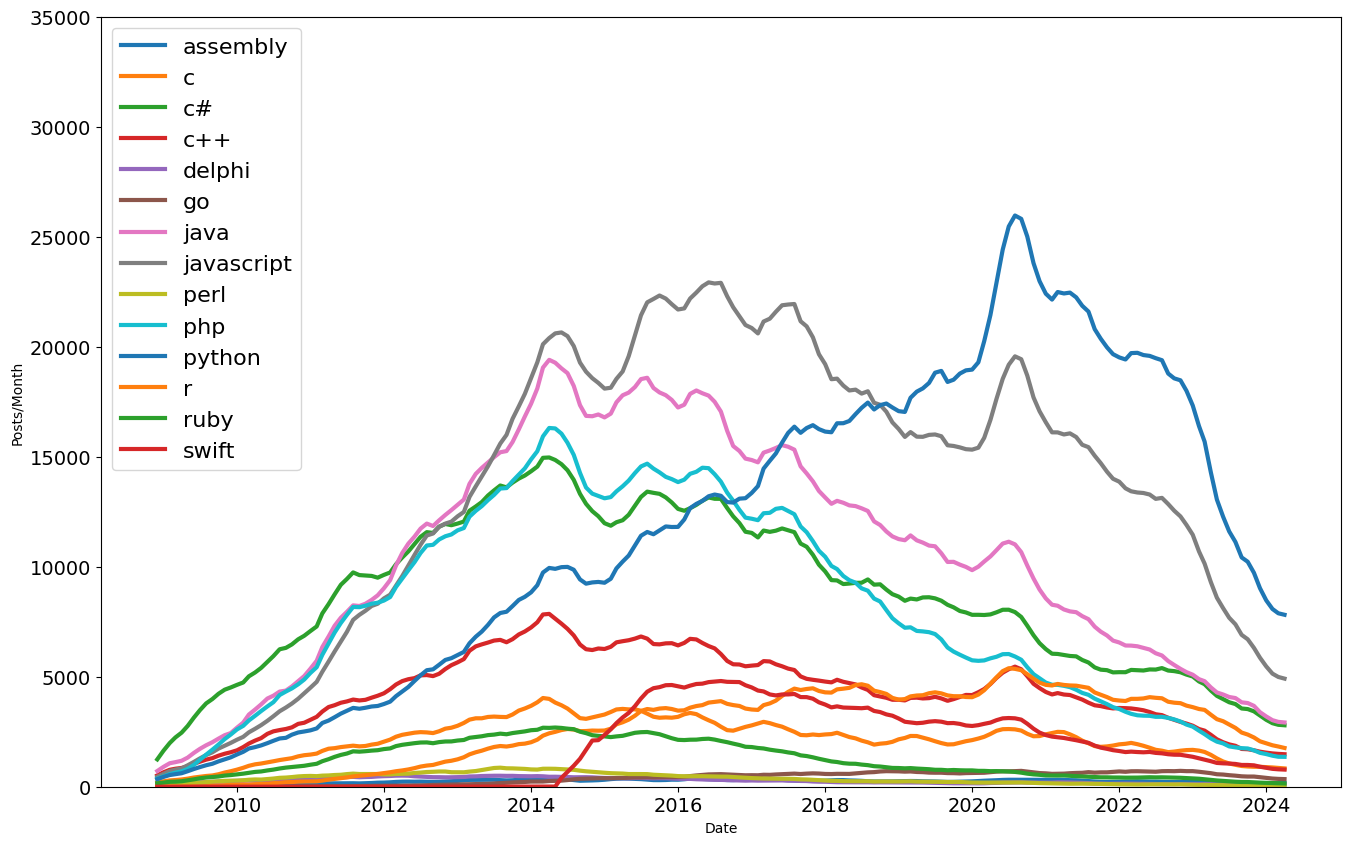

In [162]:
roll_mean_df = reshaped_df.rolling(6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel('Date')
plt.ylabel('Posts/Month')

for column in roll_mean_df.columns:
    plt.plot(roll_mean_df.index, roll_mean_df[column], linewidth=3, label=roll_mean_df[column].name)

plt.legend(fontsize=16)